# LeNet-5 (1998, Yan LeCunn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation

from tensorflow.keras.datasets import mnist

### train, test split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Data 시각화

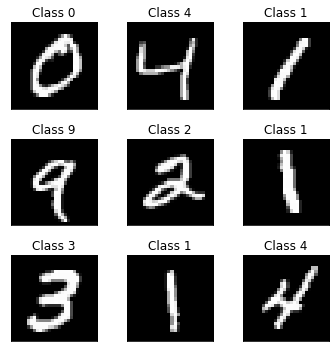

In [4]:
plt.figure(figsize=(5,5))

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

plt.show()

### feature scaling 
- 0 `~` 1 사이로 pixel 값을 scale

In [5]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

### Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가

In [6]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [7]:
X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### label 을 one-hot-encoding

In [8]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

## tf.data 를 이용한 shuffling and batch 구성

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot))\
        .shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(128)

## LeNet Model 구성

<img src="https://d2l.ai/_images/lenet.svg" width="800" />

In [10]:
model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size=5, padding="same", input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, kernel_size=5, padding="valid"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(120))
model.add(Activation ('relu'))

model.add(Dense(84))
model.add(Activation ('relu'))

model.add(Dense(10))
model.add(Activation ('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 activation_1 (Activation)   (None, 10, 10, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                    

In [11]:
model.compile(loss="categorical_crossentropy", 
              optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(train_ds, epochs=5, 
                    validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 17s 34ms/step - loss: 0.2690 - accuracy: 0.9230 - val_loss: 0.0920 - val_accuracy: 0.9704
Epoch 2/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0859 - accuracy: 0.9733 - val_loss: 0.0596 - val_accuracy: 0.9817
Epoch 3/5
469/469 [==============================] - 15s 32ms/step - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.0553 - val_accuracy: 0.9808
Epoch 4/5
469/469 [==============================] - 13s 27ms/step - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0457 - val_accuracy: 0.9839
Epoch 5/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0461 - val_accuracy: 0.9851


In [13]:
score = model.evaluate(test_ds, verbose=0)

In [14]:
print("Test loss ", score[0])
print("Test Accuracy ", score[1])

Test loss  0.0460997000336647
Test Accuracy  0.9850999712944031


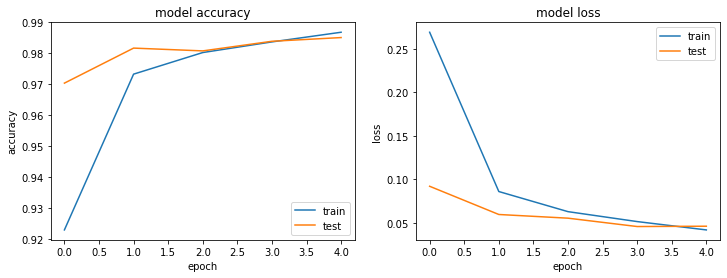

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [16]:
y_pred = model.predict(X_test_scaled).argmax(axis=1)
y_pred

313/313 [==============================] - 3s 9ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[ 976    0    0    0    0    1    0    1    2    0]
 [   0 1116    0    1    0    1    0    1   16    0]
 [   0    1 1017    7    0    0    0    3    4    0]
 [   0    0    0 1002    0    4    0    1    3    0]
 [   0    0    1    0  970    0    1    0    1    9]
 [   2    0    0    3    0  885    2    0    0    0]
 [   6    2    1    1    1    5  937    0    5    0]
 [   1    0    7    2    1    0    0 1011    3    3]
 [   1    0    1    4    0    4    0    0  962    2]
 [   2    1    0    4    6    7    0    4   10  975]]


Test Accuracy : 0.9851


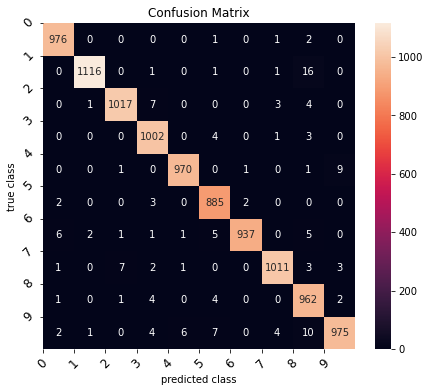

In [19]:
import seaborn as sns

plt.figure(figsize=(7,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.xlabel("predicted class")
plt.ylabel("true class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_test, y_pred))

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

Label	Class  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation

np.random.seed(102)

### Data Load

In [21]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data 시각화

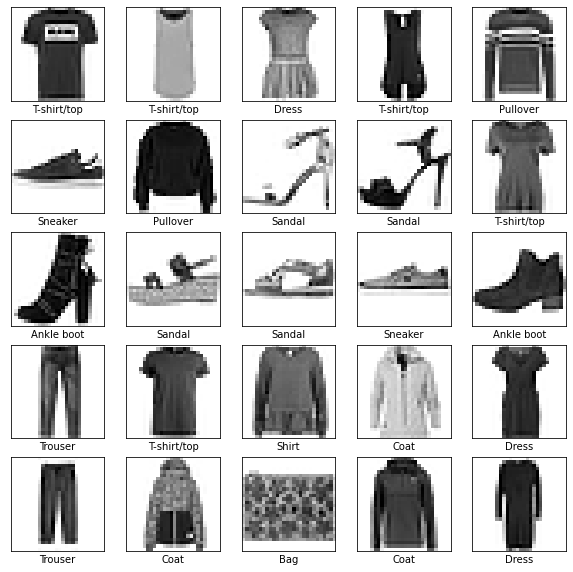

In [23]:
plt.figure(figsize=(10,10))
for i in range(1, 26):
    plt.subplot(5,5,i)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])

### Feature Scaling

In [24]:
X_train = train_images / 255.0
X_test  = test_images / 255.0

### Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가

### label 을 one-hot-encoding

### tf.data 를 이용한 shuffling and batch 구성

### LeNet model 구성

### model compile and predict

### train history 시각화

### confusion matrix 시각화